# 1–4: 資料分析流程 (波士頓房價範例) 

# Step1. 載入並探索資料

首先透過Pandas套件中的read_csv()函式載入資料。此檔案可以在kaggele(https://www.kaggle.com/schirmerchad/bostonhoustingmlnd) 上下載下來；沒有資料檔案的人，也可以透過sklearn套件的function(load_boston)去將內建的波士頓房價資料讀取出來。sklearn套件內建了一個Toy Dataset(https://scikit-learn.org/stable/datasets/toy_dataset.html)，裡面提供了約七個資料集供人快速取用。

In [1]:
from sklearn.datasets import load_boston # 從sklearn的內建資料集取出波士頓房價資料
boston = load_boston()

sklearn的內建資料集以字典(dictionary)形式存放，欲檢查字典的樣貌，通常第一步我們會先看裡面有什麼鍵(key)值:

In [2]:
boston.keys() 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

從上述可以知道data是儲存資料的值，target是目標變數Y，接下來來看看特徵變數X的名字:

In [3]:
boston.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

sklearn的內建資料集的儲存方式有經過標準化，裡面會有一個資料描述檔(DESCR)記載該份資料的變數及說明，類似使用手冊或Read Me <br>
詳細的資料描述可以去看套件提供的文件說明：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html。

In [4]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

+ CRIM-人均城鎮犯罪率。
+ ZN-劃為25,000平方英尺以上土地的住宅用地比例。
+ INDUS-每個城鎮非零售業務英畝的比例。
+ CHAS-查爾斯河虛擬變量（如果束縛河，則為1；否則為0）。
+ NOX-一氧化氮濃度（百萬分之一）。
+ RM-每個住宅的平均房間數。
+ AGE-1940年之前建造的自有住房的比例。
+ DIS-到五個波士頓就業中心的加權距離。
+ RAD-徑向公路的可達性指數。
+ TAX-每$10,000美元的全值財產稅率。
+ PTRATIO-城鎮的師生比例。
+ B-1000（Bk-0.63）^ 2，其中Bk是按城鎮劃分的黑人比例。
+ LSTAT-人口狀況降低百分比。
+ MEDV-自有住房的中位價格（以$1000為單位）。

## DataFrame
將字典格式轉換成pandas的DataFrame格式，更便於閱讀與操作。

In [5]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [6]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
import pandas as pd
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names']) # 告訴pandas：資料用boston中的data欄位的內容、欄位名稱使用boston中的feature_names的內容
df['target'] = pd.Series(boston['target']) # 在df最後面插入一個新欄位'target'

### head/tail
使用.head()和.tail()觀察前、後幾筆資料(預設為5筆, 可在括號內加入數字自訂)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


### shape

使用.shape和.columns屬性可以查看DataFrame的形狀並獲取其列的列表。

In [ ]:
print(df.shape)

(506, 14)


### information
.info()提供了DataFrame的重要資訊，例如：欄位數(coloumn)、資料筆數(row)、每個欄位的非缺失值(NA)個數，以及每個欄位儲存的資料型態，並且可以查看所有欄位是否都包含完整的資料。

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


從上例可發現，DataFrame總共有506筆紀錄(rows)、所有欄位(14個columns)都有值，並且型態皆為浮點數。

### 敘述性統計
透過.describe()可以計算摘要統計(summary statistics)，如：平均值、標準差、最小值、四分位數、最大值。

In [ ]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### 頻率(Frequency)/次數統計
由於.describe()只適用於數值變數，當資料中有類別變數時，則可利用.value_counts()來統計各獨特值(unique)的次數，例如：顏色的欄位中紅色出現2次、藍色出現5次。

In [ ]:
print(df['TAX'].value_counts(dropna=True))

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64


從上例可以看出，稅收666元的有132筆、307元的有40筆，依此類推。

# Step2. 資料視覺化

## 套件介紹

+ pandas內建繪圖功能: 非常方便，專門畫已經處理好的dataframe。
+ matplotlib: Python歷史最悠久的繪圖套件，陽春但幾乎沒畫不出來的圖，一行行code把圖案一層層疊上去。
+ seaborn: 與matplotlib是繪圖套件，可以接受dataframe資料格式，語法較簡單且美觀，但較無彈性。

## 圖種介紹

+ 散布圖(Scatter plot)：用來看兩變數之間的關係。
+ 長條圖(Bar plot)：用來比較分類變數的總數。
+ 直方圖(Histogram)：以長條圖方式表示數據分布的樣態。
+ 密度圖(Density plot)：與直方圖類似，但可反映多組數據的分布情況。
+ 折線圖(Line chart)：適合表示時間趨勢。
+ 盒鬚圖(Box plot)：適合用來看多組連續變數的統計範圍，如平均數、最小/大值、四分位距。
+ 熱圖(Heatmap)：用顏色表示數字高低的矩陣，可將複雜的表格迅速圖像化。



## 1. 散布圖(Scatter plot)

### Pandas內建繪圖功能

直接在dataframe後面加上".plot"，再指定圖種與欄位即可畫出。

<AxesSubplot:xlabel='TAX', ylabel='target'>

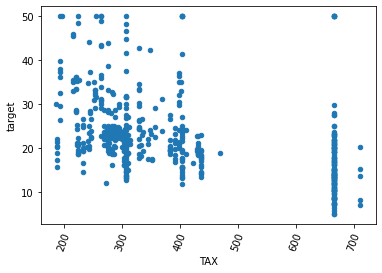

In [ ]:
df.plot(kind='scatter', x='TAX', y='target', rot=70)

<AxesSubplot:xlabel='AGE', ylabel='target'>

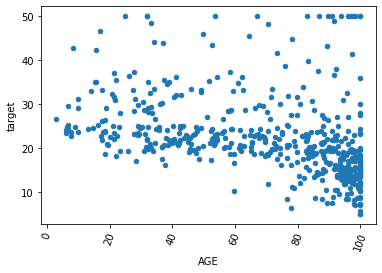

In [ ]:
df.plot(kind='scatter', x='AGE', y='target', rot=70)

### matplotlib

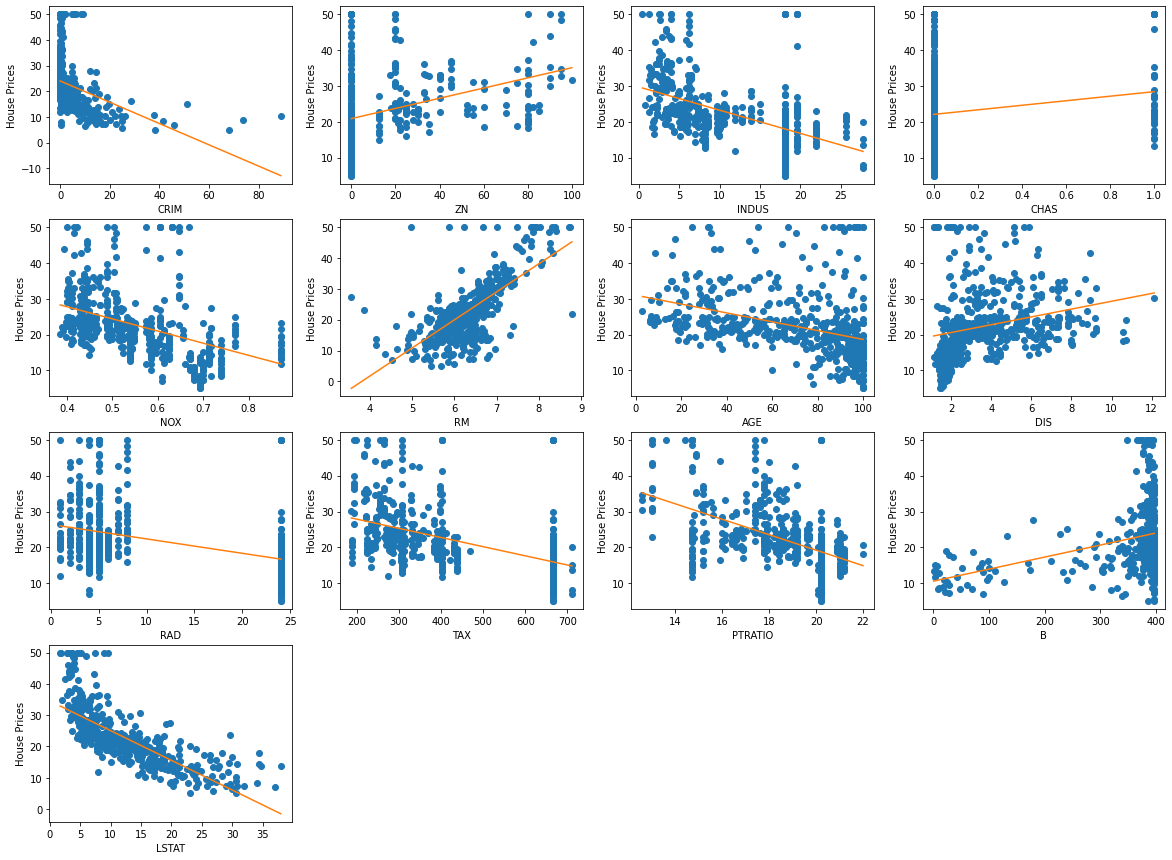

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 15))

features = df.drop('target', axis = 1)
for i, col in enumerate(features.columns):
    plt.subplot(4,4,i+1)   # 在同一張畫板上畫13張子圖並依照4列4欄擺放
    x = df[col]            # 變換x軸的欄位
    y = df['target']       # y軸維持目標變數
    plt.plot(x, y, 'o')    # 散布圖 # 'o'代表畫實心圓點
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x))) # 加上線圖
    plt.xlabel(col)        # 指定x軸名稱
    plt.ylabel('House Prices')   # 指定y軸名稱

## 2. 長條圖(Bar plot)

由於波士頓房價的資料不適合畫長條圖，我們用別的範例代替。

<AxesSubplot:>

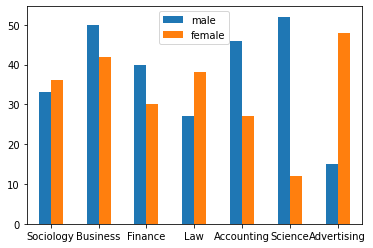

In [ ]:
y1 = [33, 50, 40, 27, 46, 52, 15]  # 男生人數
y2 = [36, 42, 30, 38, 27, 12, 48]  # 女生人數
index = ['Sociology', 'Business', 'Finance', 'Law', 'Accounting', 'Science', 'Advertising'] # 科系名稱
dep = pd.DataFrame({'male': y1, 'female': y2}, index=index)
dep.plot.bar(rot=0)

<AxesSubplot:>

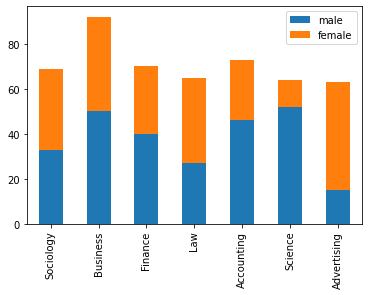

In [ ]:
dep.plot.bar(stacked=True) # 堆疊的好處在於可以比較總數

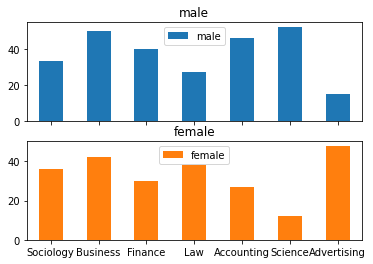

In [ ]:
dep.plot.bar(rot=0, subplots=True)
plt.show()

## 3. 直方圖(Histogram)

### seaborn

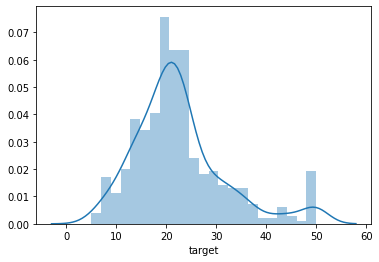

In [ ]:
import seaborn as sns 

sns.distplot(df['target'])
plt.show()

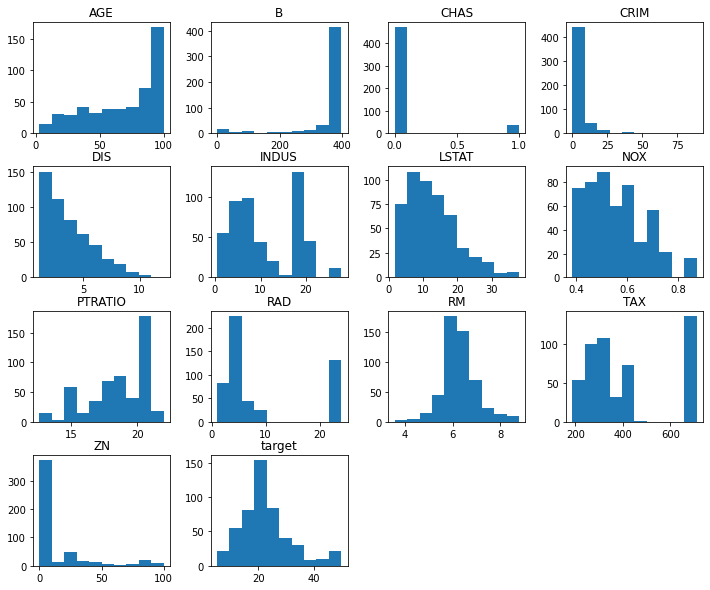

In [ ]:
df.hist(bins=10,figsize=(12,10),grid=False)
plt.show()

## 4. 密度圖(Density plot)

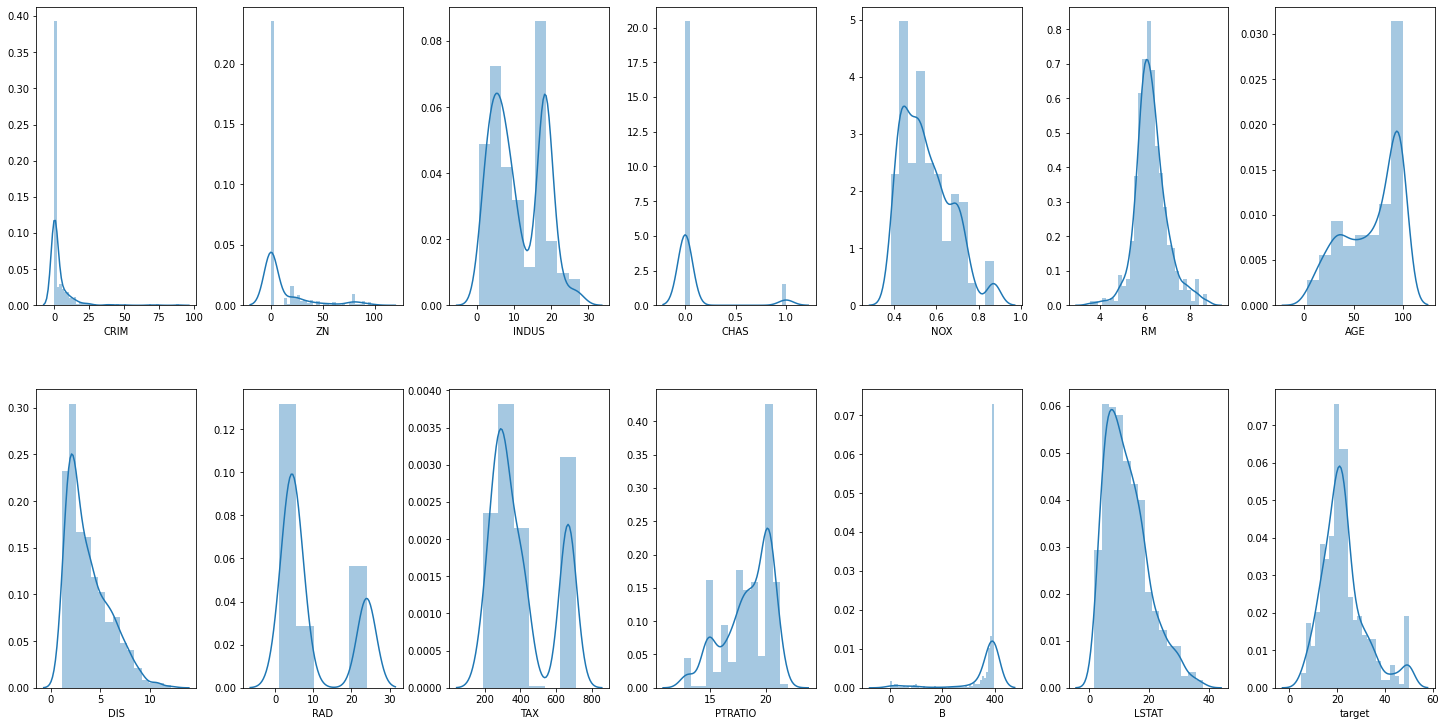

In [ ]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## 5. 折線圖(Line chart)

由於波士頓房價資料無日期與時間趨勢，我們用別的範例代替。

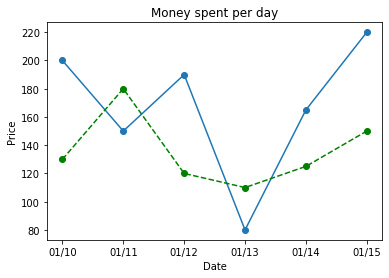

In [ ]:
from datetime import datetime
import matplotlib.dates as mdates

x = ['1/10', '1/11', '1/12', '1/13', '1/14', '1/15']
x = [datetime.strptime(d, '%m/%d').date() for d in x] # 轉為日期格式
y1 = [200,150,190,80,165,220]
y2 = [130,180,120,110,125,150]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) # 設置座標軸的格式
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1)) #座標軸刻度1天

plt.plot(x, y1,'-o')   # 設定y1線的樣式 # '-'為實線 
plt.plot(x, y2,'g--o') # 設定y2線的樣式 # 'g'為綠色 # '--'為虛線
plt.title('Money spent per day')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

## 6. 盒鬚圖(Box plot)

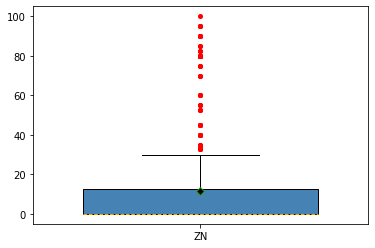

In [ ]:
plt.boxplot(x = df['ZN'],        # 欄位 
            whis = 1.5,          # 1.5倍IQR 
            widths = 0.7,        # boxplot的寬度 
            patch_artist = True, # box是否要填滿顏色 
            showmeans = True,    # 是否要顯示平均值 
            boxprops = {'facecolor':'steelblue'}, # box的填充色 
            flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4}, # 異常值的填充色、邊框色和大小 
            meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':5},            # 平均值的符號(菱形)、填充色和大小 
            medianprops = {'linestyle':'--','color':'orange'},                               # 中位數的符號(虛線)和顏色 
            labels = ['ZN'])     # x軸名稱
plt.show()

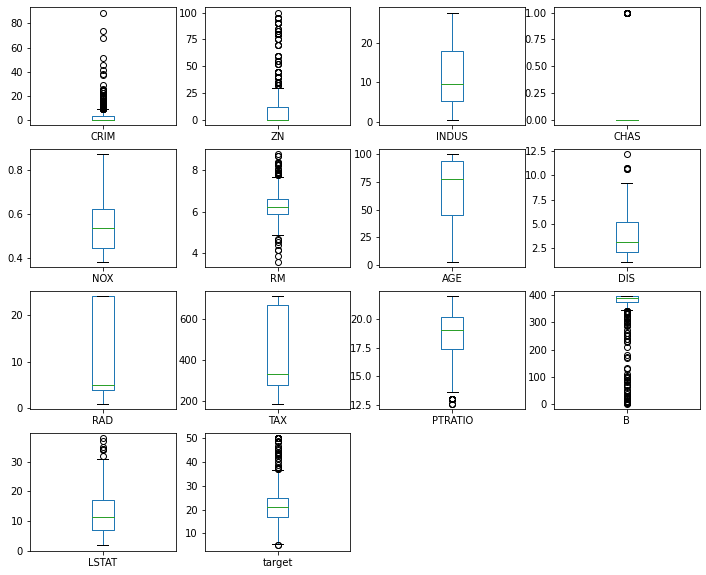

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,10))
plt.show()

## 7. 熱圖(Heatmap)

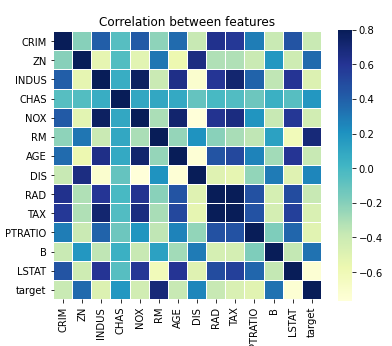

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), vmax=.8, linewidths=0.01, 
            square=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')
plt.show()

# Step3. 資料前處理

+ 遺失值(NA)
+ 異常值(Outliers)
+ 標準化(Standardization)

## 1. 遺失值(NA)處理

由於sklearn內建的資料集已經幫我們把遺失值處理完畢，因此我們使用Kaggle上的免費資料集：weather data來練習。<br>
參考來源：https://www.kaggle.com/mariogarciaar/weather-data <br>
一般程式在讀取資料時，若值中摻有文字或非數字的特殊符號(/-,?)都會以字串(str)型態儲存；為了方便之後用程式做時間的計算(60進位)，我們透過parse_dates將日期轉換成時間型態儲存。


In [ ]:
df2 = pd.read_csv("dataset/weather_data.csv", parse_dates=['day'])
df2

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [ ]:
type(df2['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

### 偵測NA
前面學到的.info()也會告訴你每個欄位有幾個是non-null，對照資料總共有entries有幾筆便可推算出來。<br>
.isnull()跟.isnan()會回傳每個觀察值是否為NA，但後者只接受numpy array輸入而不接受DataFrame的格式，因此推薦使用前者，並可依喜好搭配.any()更快速查詢單一欄位是否存在遺失項。

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          9 non-null      datetime64[ns]
 1   temperature  5 non-null      float64       
 2   windspeed    5 non-null      float64       
 3   event        7 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 416.0+ bytes


In [ ]:
df2.isnull()

,day,temperature,windspeed,event
0,False,False,False,False
1,False,True,False,False
2,False,False,True,False
3,False,True,False,True
4,False,False,True,False
5,False,True,True,False
6,False,True,True,True
7,False,False,False,False
8,False,False,False,False


In [ ]:
df2.isnull().any()

day            False
temperature     True
windspeed       True
event           True
dtype: bool

### 忽略NA
.dropna()會直接將有NA的那一整筆(row)資料丟掉，若貿然刪除帶有NA的index，可能會不小心把30%甚至以上的資料都刪除，須謹慎判斷。


In [ ]:
# 只要任一欄位中包含NA就整筆丟掉
df2.dropna()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


因為我們每筆資料都有一個day，這樣會造成無法丟掉任何資料。<br>
為了找出具有意義的NA(即temperature, windpeed, event都為NA)，因此我們將day作為index，才能把index=6的資料丟掉。<br>
以day作為index的資料以df3命名。

In [ ]:
# 所有欄位都為NA的row才丟棄
df3 = df2.set_index('day') 
df3.dropna(how="all")

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
# 至少要有2個NA以上才丟掉該row
df2.dropna(thresh = 2)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### 填補NA
.fillna()會針對資料中的Na值進行填補，括號內可以輸入一個數字、一個字典(dict)或一個方法(method)。<br>
常見的方法有：

+ 一律填0
+ 平均值
+ 內插法
+ 向前/後填補

#### 一律填0

In [ ]:
df2.fillna(0) 

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,0.0,Snow
3,2017-01-06,0.0,7.0,0
4,2017-01-07,32.0,0.0,Rain
5,2017-01-08,0.0,0.0,Sunny
6,2017-01-09,0.0,0.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


#### 平均值填補

In [ ]:
df2.fillna(df2.mean()) # 每個欄位皆算出各自的平均值

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,33.2,9.0,Sunny
2,2017-01-05,28.0,8.4,Snow
3,2017-01-06,33.2,7.0,NaN
4,2017-01-07,32.0,8.4,Rain
5,2017-01-08,33.2,8.4,Sunny
6,2017-01-09,33.2,8.4,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


#### 內插法填補

In [ ]:
df2.interpolate()

,day,temperature,windspeed,event
0,2017-01-01,32.000000,6.00,Rain
1,2017-01-04,30.000000,9.00,Sunny
2,2017-01-05,28.000000,8.00,Snow
3,2017-01-06,30.000000,7.00,NaN
4,2017-01-07,32.000000,7.25,Rain
5,2017-01-08,32.666667,7.50,Sunny
6,2017-01-09,33.333333,7.75,NaN
7,2017-01-10,34.000000,8.00,Cloudy
8,2017-01-11,40.000000,12.00,Sunny


In [ ]:
df3.interpolate()

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [ ]:
# 根據時間做內插
df3.interpolate(method='time') # 必須要index為時間格式(DatetimeIndex)

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


#### 向前/後填補

In [ ]:
 # 向前(forward)填補
df2.fillna(method = "ffill")

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-09,32.0,7.0,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [ ]:
# 向後(backward)填補
df2.fillna(method = "bfill") 

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,28.0,9.0,Sunny
2,2017-01-05,28.0,7.0,Snow
3,2017-01-06,32.0,7.0,Rain
4,2017-01-07,32.0,8.0,Rain
5,2017-01-08,34.0,8.0,Sunny
6,2017-01-09,34.0,8.0,Cloudy
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


#### 根據欄位自訂填補方式

In [ ]:
df2.fillna({
    'temperature':0,
    'windspeed':0,
    'event': 'no event'
})

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,0.0,Snow
3,2017-01-06,0.0,7.0,no event
4,2017-01-07,32.0,0.0,Rain
5,2017-01-08,0.0,0.0,Sunny
6,2017-01-09,0.0,0.0,no event
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


## 2. 異常值(Outliers)偵測

常見的異常值偵測統計方法有兩種：
+ 1.5倍的四分位距(IQR)：超過上限(Q3+1.5倍IQR)或下限(Q1-1.5IQR)之觀察值。
+ 3個標準差(sigma)原則：超過3個正/負標準差的觀察值。

### 1.5倍IQR
#### 箱型圖/盒鬚圖(Box Plot)

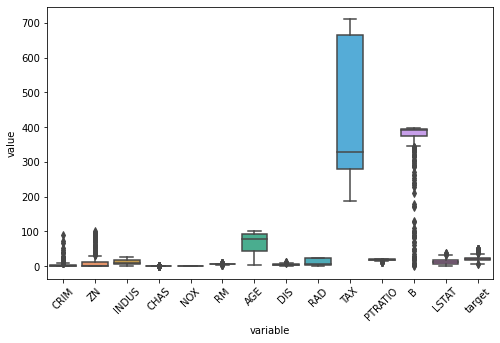

In [ ]:
plt.figure(figsize=(8,5)) # 設定畫布大小

sns.boxplot(x="variable", y="value", data=pd.melt(df), width=0.8) # melt可以將資料展開成兩欄: 變數與值

plt.xticks(rotation=45)  # 將x軸45度旋轉(避免重疊)
plt.show()

#### 各欄位異常值比例

In [ ]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column target outliers = 7.91%


#### 找出目標y的異常值

In [ ]:
q1 = df['target'].quantile(q = 0.25) # 第一四分位數
q3 = df['target'].quantile(q = 0.75) # 第三四分位數
iqr = q3-q1
upper_limit = q3 + 1.5*iqr  # 上限
lower_limit = q1 - 1.5*iqr  # 下限
print("高於 %f 和低於 %f 的資料皆為異常值。" %(upper_limit, lower_limit))

pd.DataFrame(df['target'][(df['target'] > upper_limit) | (df['target'] < lower_limit)])

高於 36.962500 和低於 5.062500 的資料皆為異常值。


,target
97,38.7
98,43.8
157,41.3
161,50.0
162,50.0
163,50.0
166,50.0
179,37.2
180,39.8
182,37.9


### 異常值(Outliers)處理

+ 刪除：明顯是異常值且數量少的情況下，可以直接刪除。
+ 用平均值取代：相較直接刪除損失的資訊少，簡單高效。
+ 不處理：若模型對異常值不敏感也可以不處理，但對於較敏感的模型(如基於距離計算的KNN等)則不該採用此作法。

In [ ]:
# 採用刪除法處理
df = df[~( (df['target'] > upper_limit) | (df['target'] < lower_limit) )] # "~"代表非，此動作是為了挑出y不為異常值的資料作為接下來分析的資料
df = df.reset_index(drop=True) # 將dataframe的index重新排序
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
462,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
463,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
464,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 3. 標準化(Standardize)

+ Z分數標準化(Z-Score Standardization)：平均值=0，標準差=1
+ 最小值最大值正規化(Min-Max Normalization)：將資料等比例縮放到0~1或-1~1區間。

### Z-score

In [ ]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(boston['data'])
pd.DataFrame(scaled_data, columns = boston['feature_names'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


### MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 取出自變數，因為我們只想要標準化自變數，並用標準化過的自變數去預測依變數
data = df.iloc[:,0:13]

# 標準化
minmax_scaler = MinMaxScaler()
minmax_data = minmax_scaler.fit_transform(data)
minmax_df = pd.DataFrame(minmax_data, columns=boston.feature_names)
minmax_df['target'] = df.target
minmax_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.058148,0.0,0.314815,0.577505,0.641607,0.268711,0.000000,0.208015,0.287234,1.000000,0.083356,24.0
1,0.000236,0.00,0.234444,0.0,0.172840,0.547998,0.782698,0.348524,0.043478,0.104962,0.553191,1.000000,0.198944,21.6
2,0.000236,0.00,0.234444,0.0,0.172840,0.694386,0.599382,0.348524,0.043478,0.104962,0.553191,0.989737,0.056960,34.7
3,0.000293,0.00,0.053333,0.0,0.150206,0.658555,0.441813,0.448173,0.086957,0.066794,0.648936,0.994276,0.026674,33.4
4,0.000705,0.00,0.053333,0.0,0.150206,0.687105,0.528321,0.448173,0.086957,0.066794,0.648936,1.000000,0.093081,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.000633,0.00,0.414444,0.0,0.386831,0.580954,0.681771,0.122080,0.000000,0.164122,0.893617,0.987619,0.213670,22.4
462,0.000438,0.00,0.414444,0.0,0.386831,0.490324,0.760041,0.104691,0.000000,0.164122,0.893617,1.000000,0.197277,20.6
463,0.000612,0.00,0.414444,0.0,0.386831,0.654340,0.907312,0.093771,0.000000,0.164122,0.893617,1.000000,0.101695,23.9
464,0.001161,0.00,0.414444,0.0,0.386831,0.619467,0.889804,0.113918,0.000000,0.164122,0.893617,0.991301,0.125035,22.0


In [ ]:
minmax_df.isnull().any() # 資料分割前再次確認一下是否有NA

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

# Step3. 特徵選取

+ 移除低變異數的特徵
+ 卡方檢定(分類模型)
+ Pearson相關係數(迴歸模型)
+ 基於模型的特徵排序

## 1. 移除低變異數的特徵

使用波士頓房價原始資料(非標準化過)，因為標準化後變異數為1，閥值不好設。

In [ ]:
from sklearn.feature_selection import VarianceThreshold
x = boston['data']
print(x.shape)
variance_x = VarianceThreshold(threshold=8) # 閥值(threshold)即為門檻值，低於該值以下則丟掉。
x = variance_x.fit_transform(x)
print(x.shape) # 從原本13個特徵變成剩下8個特徵

(506, 13)
(506, 8)


## 2. 卡方檢定

由於為分類變數使用，在此我們換了一個sklearn的內建資料集(鳶尾花花瓣)做展示。

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
x = iris.data
y = iris.target
print(x.shape)
x_new = SelectKBest(chi2,k=2).fit_transform(x,y) # 挑出得分最高的兩個變數
print(x_new.shape) # 從原本4個特徵變成剩下2個特徵

(150, 4)
(150, 2)


## 3. Pearson相關係數

利用相關係數的計算，找出相關性大的變數並從資料去除(避免共變異發生)

In [ ]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.203706,0.410679,-0.065371,0.422928,-0.199504,0.357666,-0.390521,0.637234,0.592757,0.285594,-0.421034,0.453313,-0.482030
ZN,-0.203706,1.000000,-0.536503,-0.055538,-0.513071,0.322274,-0.559513,0.685944,-0.306184,-0.302126,-0.376451,0.176910,-0.425632,0.436177
INDUS,0.410679,-0.536503,1.000000,0.037869,0.766019,-0.369447,0.646233,-0.729908,0.588879,0.708080,0.366943,-0.359898,0.620535,-0.612220
CHAS,-0.065371,-0.055538,0.037869,1.000000,0.092005,0.060187,0.077140,-0.086312,-0.033668,-0.067897,-0.120863,0.045013,-0.006830,0.097053
NOX,0.422928,-0.513071,0.766019,0.092005,1.000000,-0.308291,0.727998,-0.771634,0.607829,0.665039,0.181092,-0.383398,0.606631,-0.569014
RM,-0.199504,0.322274,-0.369447,0.060187,-0.308291,1.000000,-0.271742,0.270629,-0.161677,-0.230787,-0.223777,0.098115,-0.575358,0.568940
AGE,0.357666,-0.559513,0.646233,0.077140,0.727998,-0.271742,1.000000,-0.741121,0.452635,0.506743,0.272825,-0.282719,0.650283,-0.557098
DIS,-0.390521,0.685944,-0.729908,-0.086312,-0.771634,0.270629,-0.741121,1.000000,-0.496763,-0.545198,-0.260617,0.305245,-0.552922,0.439844
RAD,0.637234,-0.306184,0.588879,-0.033668,0.607829,-0.161677,0.452635,-0.496763,1.000000,0.910061,0.450837,-0.452738,0.496024,-0.504338
TAX,0.592757,-0.302126,0.708080,-0.067897,0.665039,-0.230787,0.506743,-0.545198,0.910061,1.000000,0.439957,-0.448525,0.546314,-0.590236


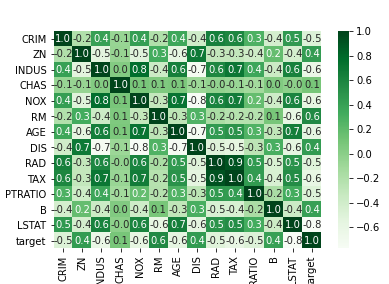

In [ ]:
sns.heatmap(corr, fmt='.1f', annot=True, cmap='Greens')
plt.show()

## 4. 基於模型的特徵排序

+ 向前特徵選取法(Forward Feature Selection)：剛開始特徵子集合是空集合，依序一次加入一個特徵並觀察模型績效是否變好，變好則保留該特徵。
+ 向後特徵淘汰法(Backward Feature Elimination)：剛開始時特徵子集合包刮資料集的所有特徵，依序一次淘汰一個特徵，直到測出模型績效最好的組合。
+ 竭盡式特徵選取法(Exhaustive Feature Selection)：將所有可能的特徵組合都測試過一輪。

向前法最佳分數: 0.16939970682195854, 特徵: ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


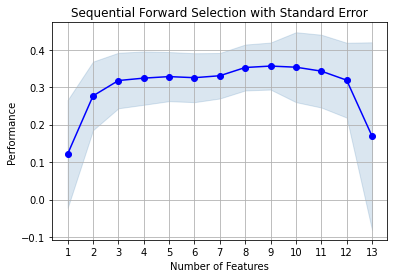

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

x = minmax_df.iloc[:, 0:13]
y = minmax_df['target']
model = LinearRegression().fit(x, y)

forward = sfs(model, k_features=13, # 共有13個特徵
          forward=True,    # 向前法
          floating=False, 
          scoring='r2',    # 使用R-square作為評分標準
          cv=10).fit(x, y) # 做10次交叉驗證
print(f"向前法最佳分數: {forward.k_score_}, 特徵: {forward.k_feature_names_}")

fig = plot_sfs(forward.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection with Standard Error')
plt.grid()
plt.show()

向後法最佳分數: 0, 特徵: ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


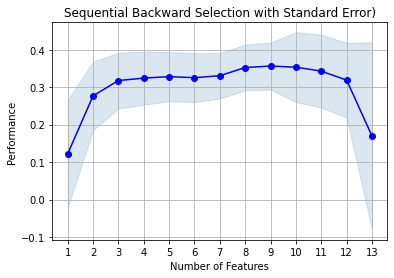

In [ ]:
backward = sfs(model, k_features=13, 
           forward=False,  # 向後法
           floating=False, 
           scoring='r2',
           cv=10).fit(x, y)
print(f"向後法最佳分數: {backward.k_score_}, 特徵: {backward.k_feature_names_}")

fig = plot_sfs(forward.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Selection with Standard Error)')
plt.grid()
plt.show()

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as exs

efs = exs(model,
          min_features=2,
          max_features=13,
          scoring='r2',
          cv=5).fit(x, y)

print(f" 竭盡法最佳分數: {efs.best_score_}, 特徵: {efs.best_feature_names_}")

Features: 8178/8178 竭盡法最佳分數: 0.5806782987326945, 特徵: ('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT')


# Step5. 切割資料集

In [ ]:
from sklearn.model_selection import train_test_split 
# scikit learn的分割資料function，須用四個變數去接回傳切好的資料
x_train, x_test, y_train, y_test = train_test_split(minmax_df.iloc[:, list(efs.best_idx_)],  # 使用剛剛用竭盡法找到的特徵組合
                                                    minmax_df['target'], # 目標變數
                                                    test_size=0.3,       # 3/7法則
                                                    random_state=2021)   # seed數，可以保證每次結果一樣

In [ ]:
# 檢查分割後的形狀
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (326, 9)
y_train: (326,)
x_test: (140, 9)
y_test: (140,)


# Step6. 製作模型

## 模型一: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 建立模型方法
model.fit(x_train, y_train)  # 餵資料
pred = model.predict(x_test) # 對新資料進行預測

In [ ]:
coeffcients = pd.DataFrame([x_train.columns,model.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-16.1515
1,ZN,5.62851
2,CHAS,1.35743
3,NOX,-8.21992
4,DIS,-12.2201
5,RAD,7.20583
6,TAX,-7.86347
7,PTRATIO,-7.51665
8,LSTAT,-17.7351


In [ ]:
from sklearn import metrics
acc_linreg = metrics.r2_score(y_test, pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.6675849001886207
Adjusted R^2: 0.644571547124756
MAE: 2.8107675877634426
MSE: 12.731032941636089
RMSE: 3.5680573063834173


## 模型二: SVM Regressor

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear') # 'linear','poly','rbf','sigmoid'
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
acc_svm = metrics.r2_score(y_test, pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.6531531413098359
Adjusted R^2: 0.6291406664774399
MAE: 2.8052703139775086
MSE: 13.28374910223112
RMSE: 3.6446877921477885


## 模型三: Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
acc_rf = metrics.r2_score(y_test, pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.7386001504344437
Adjusted R^2: 0.7205032377722129
MAE: 2.3354071428571426
MSE: 10.011248278571417
RMSE: 3.164055669322431


## 模型四: XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [ ]:
acc_xgb = metrics.r2_score(y_test, pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.7209134265826157
Adjusted R^2: 0.7015920484229506
MAE: 2.4969471999577113
MSE: 10.688625040683036
RMSE: 3.269346271150096


# Step7. 衡量績效

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
1,Random Forest,73.860015
2,XGBoost,72.091343
0,Linear Regression,66.758490
3,Support Vector Machines,65.315314
